In [1]:
'''This project uses baby name data supplied by the U.S. Social Security Administration 
that can be found at https://www.ssa.gov/oact/babynames/limits.html.'''

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

path = '/Users/glynismattheisen/Desktop/names/'
file_list = os.listdir(path)  #create a list of files in your path

MacOS_file = '.DS_Store'
if MacOS_file in file_list:
            file_list.remove(MacOS_file) # remove MacOS file

data_list = [] # create list of data files

for fi in file_list: #import all files from file_list and give appropriate column names
    full_path = path + fi
    data_df = pd.read_csv(full_path, names = ['name','gender', 'count'])
    data_df["file_name"] = fi # add file name column
    data_list.append(data_df)
    
df = pd.concat(data_list) #combine in a data frame

def get_year (s): #slice out the portion of file name containing the year and convert from string to integer
    return int(s[3:7])

df['year'] = df['file_name'].apply(get_year) # create column with the years extracted from file names
grouped_df=df.groupby(['name','year']).sum() #group by name and year

In [227]:
def plot_time_series(name): # plot time series data for specific name across all years
    grouped_df.loc[name].plot.line(x=None, y='count')
    plt.title('Name ' + name + ' Over Time')
    plt.ylabel('count')
    plt.show()

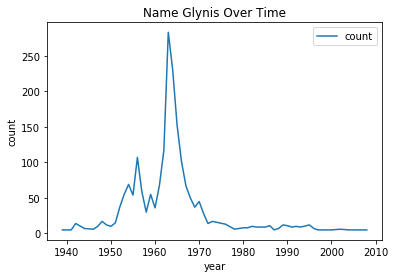

In [228]:
plot_time_series(name='Glynis')

In [229]:
girls_df = df[df.gender == 'F'] # df of just girls
girls_df.reset_index(inplace=True)

boys_df = df[df.gender == 'M'] # df just boys
boys_df.reset_index(inplace=True)

In [230]:
def get_unique(df): # gets number of unique names in df per year
    unique = [] #create empty list for unique boy names
    for i in range (1880,2018):
        mask = df['year'] == i # mask for each year in sequence
        year_df = df[mask] # create a new list containing just values where mask == True
        year_uni_df = year_df['name'].unique() # determine unique names within each year
        year_uni_num_df = [len(year_uni_df), i] # calculate length of unique list to get # of unique names
        unique.append(year_uni_num_df) # append to boys_unique list
        i += 1 # increase value to perform function of next year
    unique_df = pd.DataFrame(unique, columns=['# unique names','year']) #convert to dataframe
    return unique_df

boys_unique = get_unique(boys_df)
girls_unique = get_unique(girls_df)

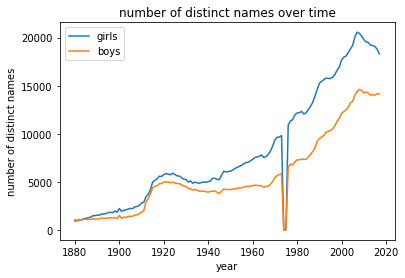

In [231]:
#plot unique boy/girl names over time
plt.plot(girls_unique['year'], girls_unique['# unique names'],label='girls')
plt.plot(boys_unique['year'], boys_unique['# unique names'],label='boys')
plt.legend()
plt.title('number of distinct names over time')
plt.ylabel('number of distinct names')
plt.xlabel('year')
plt.show()

In [221]:
def plot_name(df, name):
    name_df = df[df.name == name] #get just the data for a specific name
    name_df.sort_values(by='year', inplace=True) #sort by year
    name_df = name_df.drop('file_name',axis=1) #drop file name column
    name_df.reset_index(inplace=True)
    
    X = name_df[['year']].values
    y = name_df[['count']].values
    
    X = np.array(X).reshape(-1,1)
    y = np.array(y)

    m = LinearRegression() # create linear regression instance
    m.fit(X,y)
    ypred = m.predict(X)
    
    plt.plot(X,y,'bo', label= name +' per year')
    plt.plot(X, ypred,'rx', label ='Predicted ' + name + ' per year')
    plt.xlabel('Year')
    plt.ylabel('# of ' + name)
    plt.legend()
    plt.title(name + ' per Year')
    plt.show()
    return name_df


/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


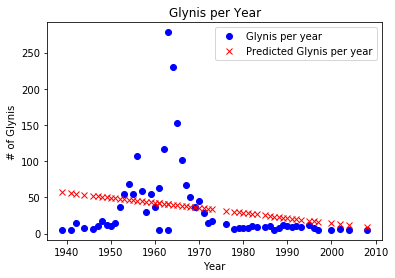

In [222]:
Glynis_df = plot_name(df,name = 'Glynis')

In [223]:
def plot_norm_name(name_df, name, degree_poly):
    
    total_births_each_year = [] # sum total births per year for only the years there were name existed in birth population
    for i in name_df['year']:
            mask = df['year'] == i # mask for each year in sequence
            indiv_year = df[mask] # create a new list containing just values where mask == True
            births_in_year = [indiv_year['count'].sum(), i]# calculate sum of babies for that year and store as data_2
            total_births_each_year.append(births_in_year) # append to to births_year
            i += 1
            
    total_births_each_year_df = pd.DataFrame(total_births_each_year, columns = ['total births','year'])
    total_births_each_year_df.sort_values(by='year', inplace=True) # sort by year
    total_births_each_year_df.reset_index(inplace=True)
    
    name_df['total births'] = total_births_each_year_df['total births']
    name_df['norm'] = name_df['count'] / name_df['total births'] # normalize to overall number of births

    X = name_df[['year']].values
    y = name_df[['norm']].values

    m = LinearRegression()
    m.fit(X,y)
    ypred = m.predict(X)
    
    poly = PolynomialFeatures(degree = degree_poly) # set degree of polynomial fit
    X_ = poly.fit_transform(X) # transform X data
    m.fit(X_, y)
    ypred_poly = m.predict(X_)

    # plot data v prediction from model
    plt.plot(X,y,'bo', label= name + ' per year')
    plt.plot(X, ypred,'rx', label ='Predicted ' + name + ' per year')
    plt.plot(X, ypred_poly,'go', label ='Polynomial Predicted ' + name + ' per year')
    plt.xlabel('Year')
    plt.ylabel('# of ' + name)
    plt.title(name + ' per Year Normalized')
    plt.legend()
    plt.ylim(-.00001,0.0001)
    plt.show()

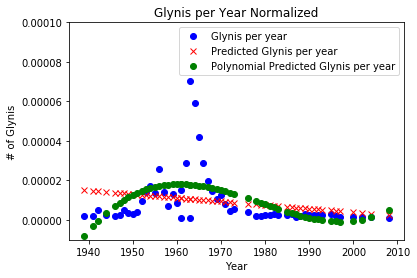

In [224]:
plot_norm_name(Glynis_df, name = 'Glynis', degree_poly = 5)